In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import credit_data

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
train_data, test_data, train_label, test_label = credit_data.load_data()

train_data = train_data.todense()
test_data = test_data.todense()
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(15906, 67) (6818, 67) (15906, 3) (6818, 3)


In [3]:
model = models.Sequential()

model.add(layers.Dense(input_dim=67, units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=3, activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [4]:
model.compile(optimizer=optimizers.Adam(),
            loss=losses.categorical_crossentropy, 
            metrics=[metrics.categorical_accuracy])

In [5]:
history = model.fit(train_data, train_label, batch_size=100, epochs=10, validation_split=0.3)

Epoch 1/10
112/112 [==============================] - 3s 27ms/step - loss: 1.0975 - categorical_accuracy: 0.5816 - val_loss: 0.8916 - val_categorical_accuracy: 0.6517
Epoch 2/10
112/112 [==============================] - 3s 26ms/step - loss: 0.9114 - categorical_accuracy: 0.6378 - val_loss: 0.8846 - val_categorical_accuracy: 0.6490
Epoch 3/10
112/112 [==============================] - 2s 21ms/step - loss: 0.8787 - categorical_accuracy: 0.6589 - val_loss: 0.8800 - val_categorical_accuracy: 0.6503
Epoch 4/10
112/112 [==============================] - 2s 21ms/step - loss: 0.8563 - categorical_accuracy: 0.6659 - val_loss: 0.8590 - val_categorical_accuracy: 0.6609
Epoch 5/10
112/112 [==============================] - 2s 22ms/step - loss: 0.8434 - categorical_accuracy: 0.6744 - val_loss: 0.8816 - val_categorical_accuracy: 0.6653
Epoch 6/10
112/112 [==============================] - 3s 27ms/step - loss: 0.8330 - categorical_accuracy: 0.6787 - val_loss: 0.8597 - val_categorical_accuracy: 0.664

In [6]:
result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

214/214 [==============================] - 7s 31ms/step - loss: 0.8290 - categorical_accuracy: 0.6781
loss (cross-entropy) : 0.8289667367935181
test accuracy : 0.6780581474304199


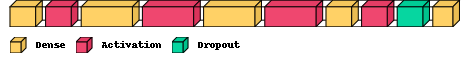

In [7]:
import visualkeras

visualkeras.layered_view(model, legend=True)